### Install Dependencies


In [ ]:
!pip3 install torch torchvision torchaudio
!pip install transformers
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install speechrecognition
!pip install datasets
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http:/

### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from datasets import load_dataset
import pandas as pd
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pytesseract
import speech_recognition as sr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import gradio as gr

### Dataset
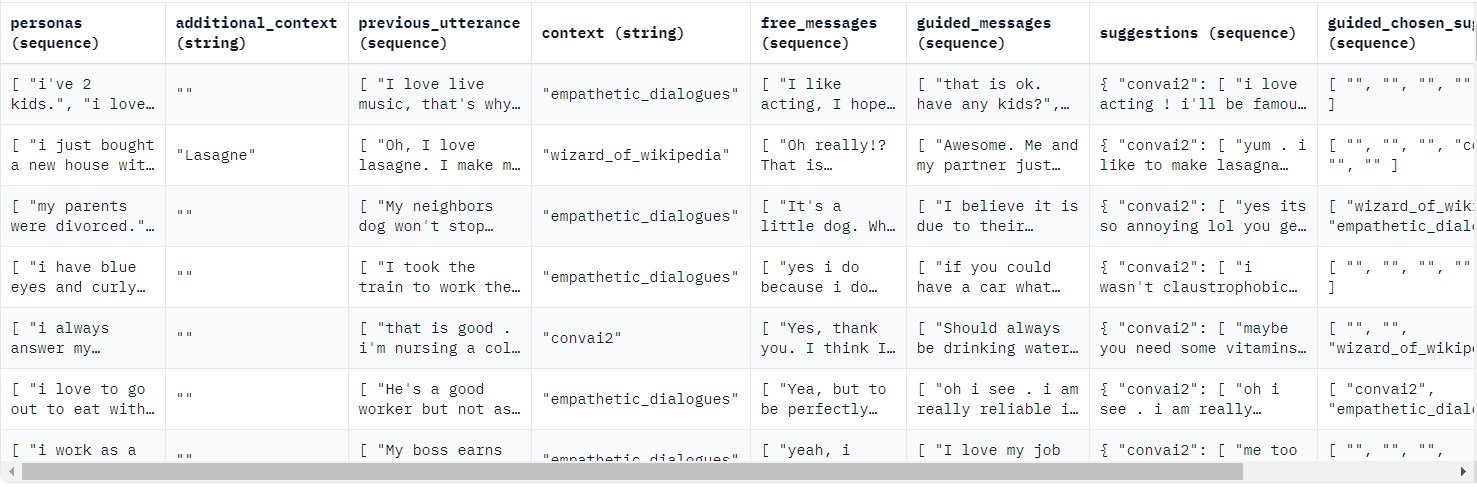

In [ ]:
# Load the Blended Skill Talk dataset
dataset = load_dataset("blended_skill_talk")

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(dataset['train'])

# View the DataFrame
df.head()

Generating train split:   0%|          | 0/4819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1009 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/980 [00:00<?, ? examples/s]

Dataset blended_skill_talk downloaded and prepared to /root/.cache/huggingface/datasets/blended_skill_talk/default/1.0.0/8544e13cbbf2fb9b34157f2e2f28c1539e4f36bf0ef2bd96edd138b4000c5ca1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

,personas,additional_context,previous_utterance,context,free_messages,guided_messages,suggestions,guided_chosen_suggestions,label_candidates
0,"[i've 2 kids., i love flowers.]",,"[I love live music, that's why I try to go to ...",empathetic_dialogues,"[I like acting, I hope to be an actor, what ab...","[that is ok. have any kids?, that is good. I ...",{'convai2': ['i love acting ! i'll be famous s...,"[, , , , , ]",[]
1,"[i just bought a new house with my partner., i...",Lasagne,"[Oh, I love lasagne. I make my own noodles as ...",wizard_of_wikipedia,[Oh really!? That is interesting. I am actuall...,[Awesome. Me and my partner just bought a hous...,{'convai2': ['yum . i like to make lasagna and...,"[, , , convai2, , ]",[]
2,"[my parents were divorced., i'm a widow.]",,[My neighbors dog won't stop barking at me. Ug...,empathetic_dialogues,[It's a little dog. Why is it the little ones ...,[I believe it is due to their behavior and int...,{'convai2': ['yes its so annoying lol you get ...,"[wizard_of_wikipedia, empathetic_dialogues, wi...",[]
3,"[i have blue eyes and curly brown hair., i lov...",,[I took the train to work the other day and it...,empathetic_dialogues,"[yes i do because i do not have a car, a honda...","[if you could have a car what would it be?, i ...","{'convai2': ['i wasn't claustrophobic before ,...","[, , , , , ]",[]
4,"[i always answer my cellphone., i work in sales.]",,[that is good . i'm nursing a cold and vitamin...,convai2,"[Yes, thank you. I think I just need some time...","[Should always be drinking water anyways, your...",{'convai2': ['maybe you need some vitamins . v...,"[, , wizard_of_wikipedia, , convai2, empatheti...",[]


### Build the Model

In [ ]:
# generator=pipeline("question-answering",model='EleutherAI/gpt-neo-1.3B')

In [ ]:
prompt="why am I feeling down?"

In [ ]:
# res=generator(prompt,max_length=100,do_sample=True,temperature=0.9)

In [ ]:
# print(res[0]['generated_text'])

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/blenderbot-400M-distill")

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/blenderbot-400M-distill")

In [ ]:
r= sr.Recognizer()

In [ ]:
# audi_file="/tmp/d81c90f127e3bfac485f1aa359e72dfed3377ad5/audio_file-0-100.wav"
# # audio_file = "/content/audio_file.wav"
# with sr.AudioFile(audio_file) as source:
#     audio = r.record(source)

# # Transcribe audio
# try:
#     text = r.recognize_google(audio)
#     print("Transcription: " + text)
# except sr.UnknownValueError:
#     print("Could not understand audio")
# except sr.RequestError as e:
#     print("Could not request results; {0}".format(e))

In [ ]:
# audio_file = "/content/audio_file.wav"
# print(audio_file)

In [ ]:
# with sr.AudioFile(audio_file) as source:
#     audio = r.record(source)

# # Transcribe audio
# # try:
# text = r.recognize_google(audio)
# print(text)

#### Speech to text

In [ ]:
def speech_to_text(audio):
  with sr.AudioFile(audio) as source:
    audio = r.record(source)

    # Transcribe audio
    try:
        text = r.recognize_google(audio)
        return text
    except sr.UnknownValueError:
          return "Could not understand audio"
    except sr.RequestError as e:
          return "Could not request results"

#### Extract text from image

In [ ]:
def extract_text_from_image(image):
  extractedText = pytesseract.image_to_string(image,lang='eng+tam+hin+kan+tel+mal',config='--psm 6')
  extractedText= extractedText.replace('\n', ' ')
  return extractedText

#### Generate response from model

In [ ]:
def generateText(input_text):
  if type(input_text)==np.ndarray:
    image=input_text
    text=extract_text_from_image(image)
  elif type(input_text)==str and input_text.split(".")[-1]=="wav":
    audio=input_text
    text=speech_to_text(audio)
  else:
    text=input_text
  encoded_input = tokenizer.encode(text, return_tensors="pt")
  output = model.generate(encoded_input,
                          max_length=150,
                          num_beams=5,
                          no_repeat_ngram_size=3,
                          early_stopping=True,
                          top_k=0,
                          temperature=0.9)
  op = tokenizer.decode(output[0], skip_special_tokens=True)
  return op

In [ ]:
# text="I am so happy today"
# generateText(text)

### Image Processing to get Text

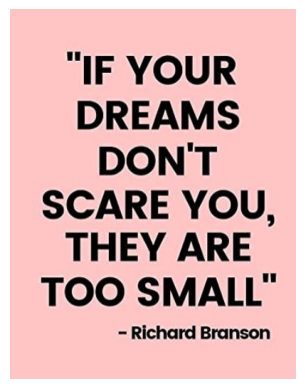

In [ ]:
# original image
ori_image = cv2.imread("/content/2023-04-14_10h26_28.jpg") #Extracting the image
ori_img = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # Appyling color
plt.imshow(ori_img)
plt.axis('off')
plt.show()

(-0.5, 481.5, 623.5, -0.5)

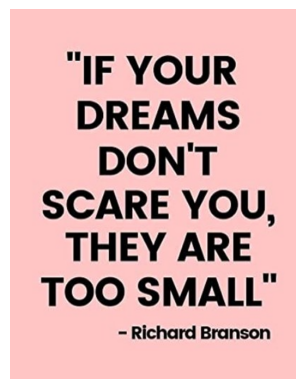

In [ ]:
fixed_img = cv2.resize(ori_img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
plt.imshow(fixed_img)
plt.axis("off")

In [ ]:
ogimg = cv2.cvtColor(fixed_img, cv2.COLOR_RGB2GRAY) #to convert an RGB image to gray scale

(-0.5, 481.5, 623.5, -0.5)

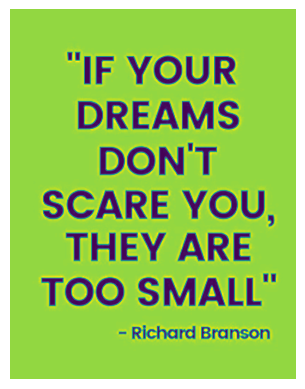

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) # library to create a structuring element for morphological operations.
dilation = cv2.dilate(ogimg, kernel, iterations=1) #applying dilation
plt.imshow(dilation)
plt.axis("off")

(-0.5, 481.5, 623.5, -0.5)

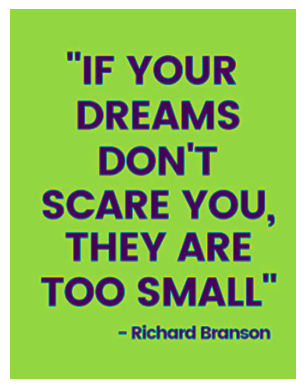

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erosion= cv2.erode(dilation, kernel, iterations=1) # erostion
plt.imshow(erosion)
plt.axis("off")

(-0.5, 481.5, 623.5, -0.5)

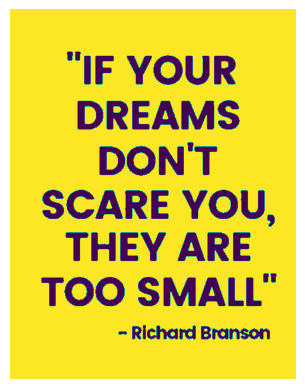

In [ ]:
binary = cv2.threshold(cv2.medianBlur(erosion, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] # thresholding for converting the image to bianry
plt.imshow(binary)
plt.axis("off")

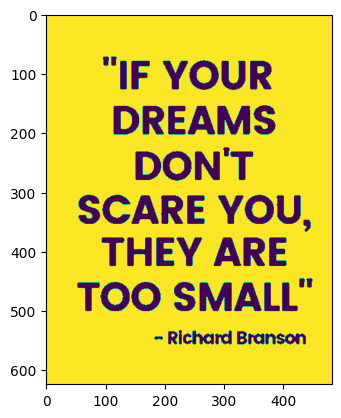

In [ ]:
gsbin = binary.astype(np.uint8) #storing the binary image in 8 bit
# gsbin= 255 * gsbin
plt.imshow(gsbin)

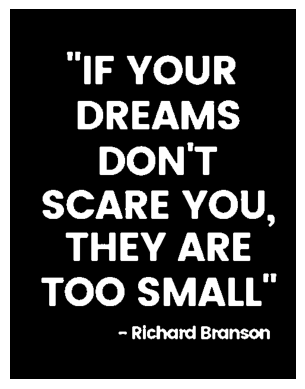

In [ ]:
image2 = cv2.cvtColor(255-gsbin, cv2.COLOR_GRAY2RGB) #to convert a grayscale image represented by the 255-gsbin variable to an RGB image.
plt.imshow(image2)
plt.axis('off')
plt.show()

In [ ]:
extract_text_from_image(image2)

'“IF YOUR DREAMS DON\'T SCARE YOU, THEY ARE TOO SMALL"  aoe i ike arco) \x0c'

### Passing Images to ChatBot Model to test the response

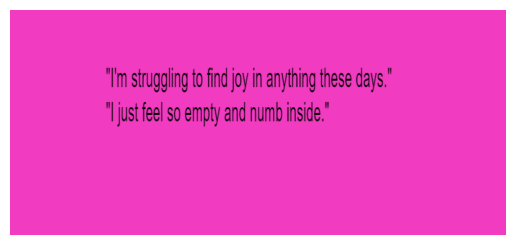

In [ ]:
image1=cv2.imread("/content/1681447969 (1).jpg") #Extracting the image
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.axis('off')
plt.show()

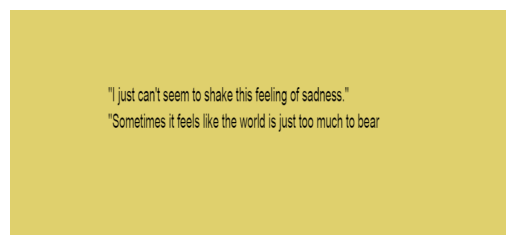

In [ ]:
image2=cv2.imread("/content/1681447969.png") #Extracting the image
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.axis('off')
plt.show()

In [ ]:
print("Image 1 response :",generateText(image1))
print("Image 3 response :",generateText(image2))

Image 1 response :  I'm sorry to hear that. I hope things get better for you. What's going on?
Image 3 response :  I know what you mean. It's like you can't stop thinking about the bad things in the world.


### Build a Gradio Interface for deploying the chatbot

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("Blenderbot Chatbot")
    with gr.Tab("Text"):
        text_input = gr.inputs.Textbox(label="Enter your message here")
        text_output = gr.outputs.Textbox()
        text_button = gr.Button("Chat")
    with gr.Tab("Image"):
        image_input = gr.inputs.Image(label="Upload an image")
        image_output = gr.outputs.Textbox()
        image_button = gr.Button("IChat")
    with gr.Tab("Audio"):
        audio_input=gr.inputs.Audio(source="microphone",type="filepath")
        audio_output=gr.outputs.Textbox()
        audio_button=gr.Button("AChat")

    text_button.click(generateText, inputs=[text_input], outputs=text_output)
    image_button.click(generateText, inputs=[image_input], outputs=image_output)
    audio_button.click(generateText, inputs=[audio_input], outputs=audio_output)

if __name__ == "__main__":
    demo.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
# image_file = gr.inputs.Image(label="Upload an image")
# audio_input = gr.Audio(source="microphone",type="filepath")
# output_image = gr.outputs.Image(type="pil",label="Modified Image")
# demo = gr.Interface(generateText, inputs=["text",image_file,audio_input], outputs=["text"], title="Blenderbot Chat")
# demo.launch()

In [ ]:
# import gradio as gr
# demo=gr.Interface(generateText,inputs="text",outputs="text")
# demo.launch()